,Modelo,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.9796 ± 0.0034,0.9796 ± 0.0045,0.9952 ± 0.0021,0.9873 ± 0.0021
1,RF,0.9944 ± 0.0007,0.9966 ± 0.0017,0.9964 ± 0.0019,0.9965 ± 0.0004
2,LR,0.9845 ± 0.0030,0.9943 ± 0.0020,0.9863 ± 0.0027,0.9903 ± 0.0019
3,NB,0.2475 ± 0.0084,0.9073 ± 0.0603,0.0645 ± 0.0083,0.1204 ± 0.0147
4,SVM,0.9892 ± 0.0020,0.9986 ± 0.0013,0.9879 ± 0.0031,0.9932 ± 0.0012
5,MLP,0.9904 ± 0.0021,0.9936 ± 0.0011,0.9944 ± 0.0031,0.9940 ± 0.0013


Debug - Verificando valores:
Acurácia: [0.9796149925428971, 0.9943996404521466, 0.9845427063508403, 0.2475341344488021, 0.9892474603166631, 0.9903680343880404]
Precisão: [0.9795941428837119, 0.9966386278960495, 0.9943462249376855, 0.9072661543249778, 0.9985867613613694, 0.9935569290757404]
Recall: [0.9952314165497895, 0.9963534361851334, 0.9862552594670408, 0.06451612903225808, 0.9879382889200562, 0.994389901823282]
F1-Score: [0.9873425386321983, 0.9964929886318045, 0.9902821643870328, 0.12035231614697883, 0.9932296745639375, 0.9939696150841275]


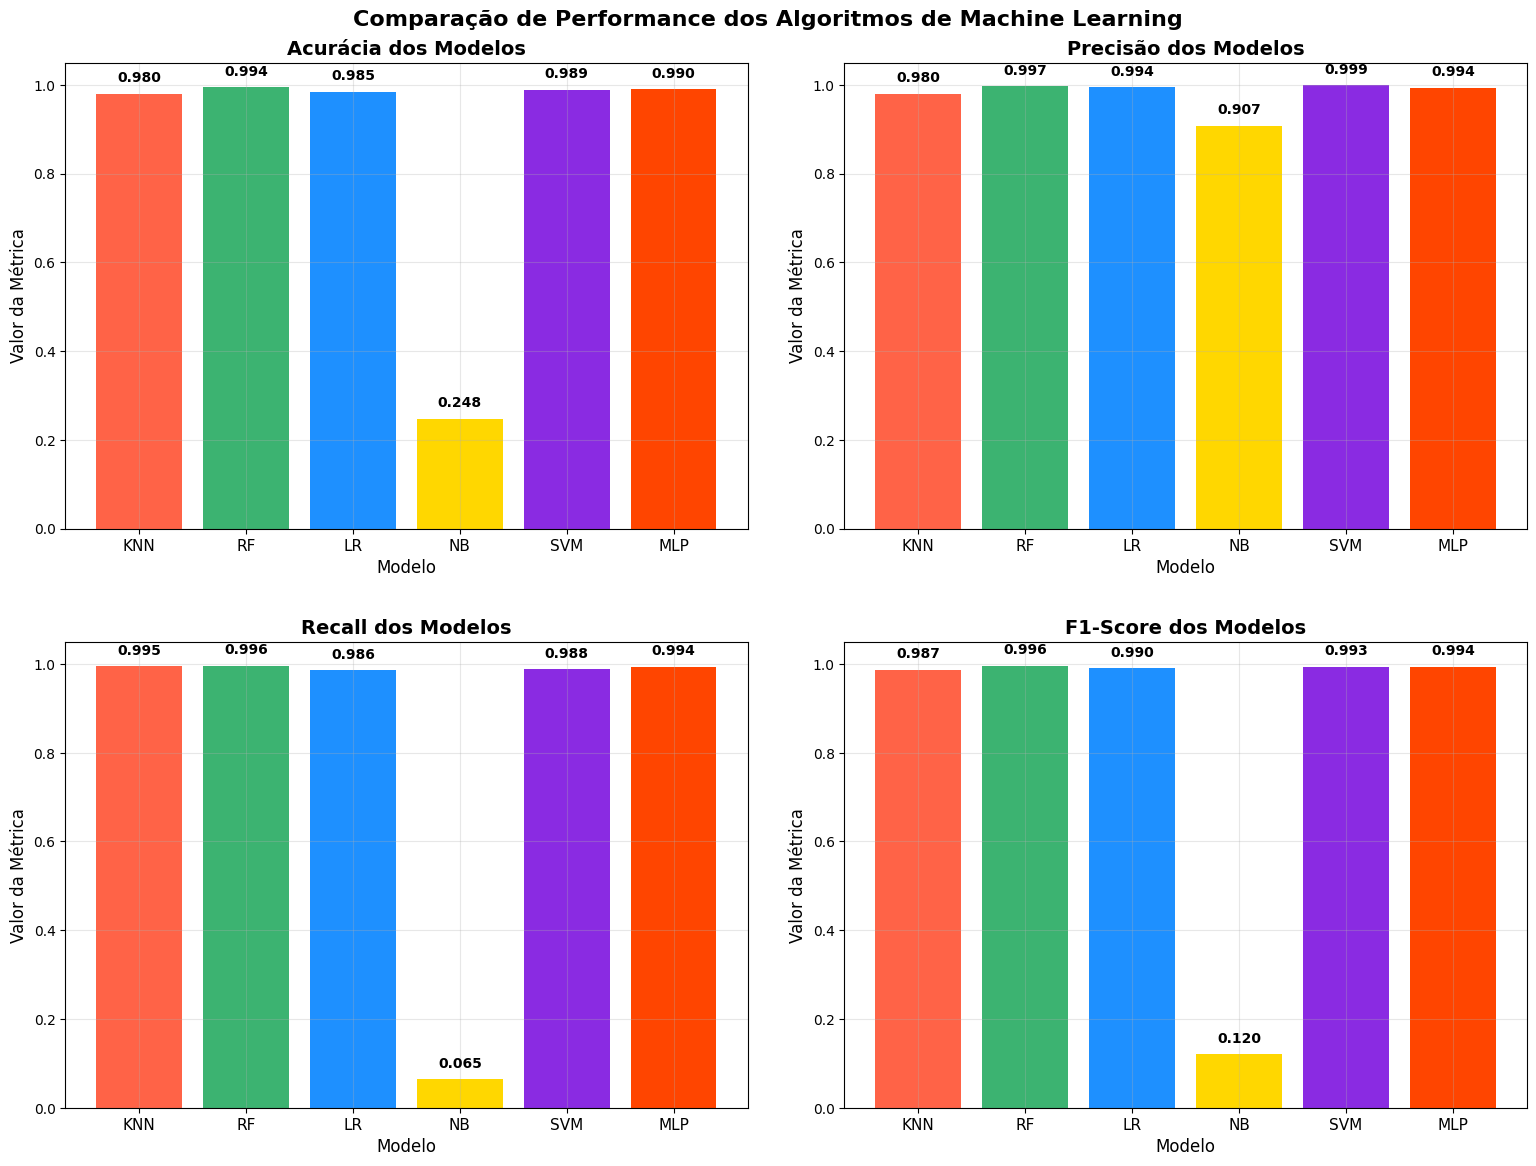

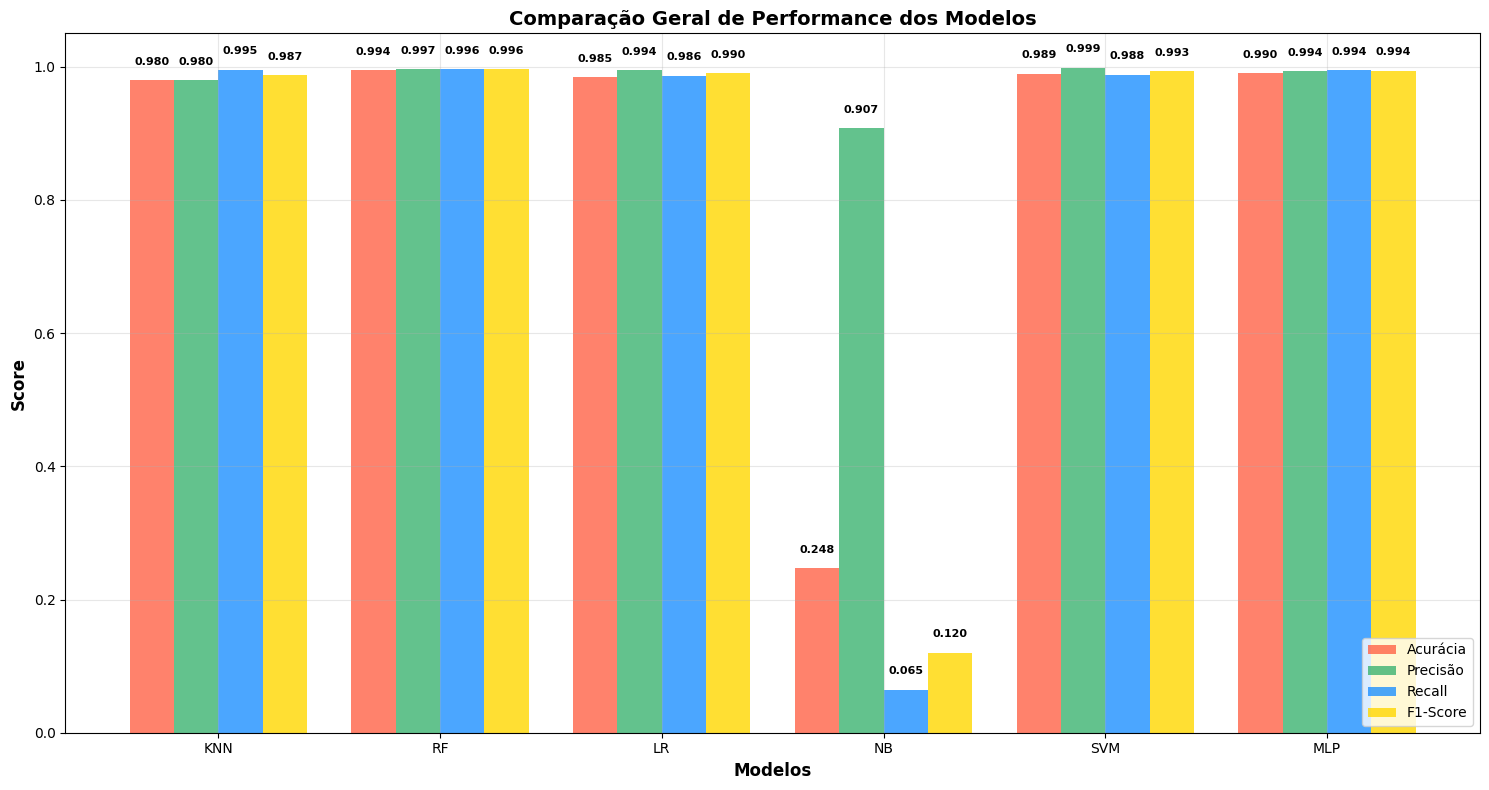


                    RESUMO DETALHADO DOS RESULTADOS
Modelo Acurácia   Precisão   Recall     F1-Score  
----------------------------------------------------------------------
KNN    0.9796     0.9796     0.9952     0.9873    
RF     0.9944     0.9966     0.9964     0.9965    
LR     0.9845     0.9943     0.9863     0.9903    
NB     0.2475     0.9073     0.0645     0.1204    
SVM    0.9892     0.9986     0.9879     0.9932    
MLP    0.9904     0.9936     0.9944     0.9940    


In [ ]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

df = pd.read_csv('/content/TUANDROMD.csv')
target_col = df.columns[-1]
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]

imputer = SimpleImputer(strategy='constant', fill_value=0)
X_imputed = imputer.fit_transform(X)

modelos = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RF': RandomForestClassifier(random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'NB': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}

# K-FOLD + SMOTE + AVALIAÇÃO

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for nome, modelo in modelos.items():
    acuracias, precisions, recalls, f1s = [], [], [], []

    for train_idx, test_idx in kfold.split(X_imputed, y):
        X_train, X_test = X_imputed[train_idx], X_imputed[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        modelo.fit(X_train_res, y_train_res)
        y_pred = modelo.predict(X_test)

        acuracias.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, zero_division=0))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))

    media_acuracia = np.mean(acuracias)
    media_precisao = np.mean(precisions)
    media_recall = np.mean(recalls)
    media_f1 = np.mean(f1s)

    std_acuracia = np.std(acuracias)
    std_precisao = np.std(precisions)
    std_recall = np.std(recalls)
    std_f1 = np.std(f1s)

    resultados.append({
        'Modelo': nome,
        'Acurácia': f"{media_acuracia:.4f} ± {std_acuracia:.4f}",
        'Precisão': f"{media_precisao:.4f} ± {std_precisao:.4f}",
        'Recall': f"{media_recall:.4f} ± {std_recall:.4f}",
        'F1-Score': f"{media_f1:.4f} ± {std_f1:.4f}",

        'Acurácia_num': media_acuracia,
        'Precisão_num': media_precisao,
        'Recall_num': media_recall,
        'F1-Score_num': media_f1,
    })

df_resultados = pd.DataFrame(resultados)
display(df_resultados[['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score']])


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metricas_num = ['Acurácia_num', 'Precisão_num', 'Recall_num', 'F1-Score_num']
labels = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']

cores = ['#FF6347', '#3CB371', '#1E90FF', '#FFD700', '#8A2BE2', '#FF4500']

# Debug: Verificando valores
print("Debug - Verificando valores:")
for i, metrica_num in enumerate(metricas_num):
    print(f"{labels[i]}: {df_resultados[metrica_num].tolist()}")

# Iterar sobre cada métrica e eixo para gerar os gráficos de barras
for i, metrica_num in enumerate(metricas_num):
    valores = df_resultados[metrica_num].tolist()
    modelos_abrev = df_resultados['Modelo'].tolist()

    row, col = divmod(i, 2)
    bars = axes[row, col].bar(modelos_abrev, valores, color=cores[:len(valores)])

    # Adicionando os valores de cada barra - POSICIONAMENTO CORRIGIDO
    for j, (modelo, valor) in enumerate(zip(modelos_abrev, valores)):
        # Posicionar texto com espaço adequado acima da barra
        altura_texto = valor + 0.02
        axes[row, col].text(j, altura_texto, f"{valor:.3f}", ha='center', va='bottom',
                           fontsize=10, fontweight='bold')

    axes[row, col].set_title(f'{labels[i]} dos Modelos', fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel('Valor da Métrica', fontsize=12)
    axes[row, col].set_xlabel('Modelo', fontsize=12)
    axes[row, col].grid(True, alpha=0.3)

    # CORREÇÃO PRINCIPAL: Garantir que o eixo Y tenha espaço adequado para os valores
    axes[row, col].set_ylim(0, 1.05)

    axes[row, col].tick_params(axis='x', labelsize=11)
    axes[row, col].tick_params(axis='y', labelsize=10)

# Ajuste para o layout com mais espaço superior

plt.tight_layout(pad=3.0)
plt.suptitle('Comparação de Performance dos Algoritmos de Machine Learning',
             fontsize=16, fontweight='bold', y=0.99)
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))

x = np.arange(len(df_resultados['Modelo']))
width = 0.2

metricas_plot = ['Acurácia_num', 'Precisão_num', 'Recall_num', 'F1-Score_num']
labels_plot = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
cores_plot = ['#FF6347', '#3CB371', '#1E90FF', '#FFD700']

for i, (metrica, label, cor) in enumerate(zip(metricas_plot, labels_plot, cores_plot)):
    valores = df_resultados[metrica].tolist()
    bars = ax.bar(x + i*width, valores, width, label=label, color=cor, alpha=0.8)

    # Adicionar valores nas barras com posicionamento otimizado - CORRIGIDO
    for j, valor in enumerate(valores):
        # Posicionar texto com espaço adequado acima da barra
        altura_texto = valor + 0.02
        ax.text(j + i*width, altura_texto, f"{valor:.3f}",
                ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparação Geral de Performance dos Modelos', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(df_resultados['Modelo'])
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

# CORREÇÃO PRINCIPAL: Garantir que o eixo Y tenha espaço adequado para os valores
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("                    RESUMO DETALHADO DOS RESULTADOS")
print("="*70)
print(f"{'Modelo':<6} {'Acurácia':<10} {'Precisão':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 70)
for i, resultado in enumerate(resultados):
    print(f"{resultado['Modelo']:<6} {resultado['Acurácia_num']:<10.4f} "
          f"{resultado['Precisão_num']:<10.4f} {resultado['Recall_num']:<10.4f} "
          f"{resultado['F1-Score_num']:<10.4f}")
print("="*70)